<p align="left">
  <a href="https://colab.research.google.com/github/fernandoarcevega/AI_Workshop/blob/main/Day_1/06_K_means/06_kmeans_mnl.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="200">
  </a>
</p>

In [ ]:
###############################################
# Author 1: Wilfrido Gómez-Flores (CINVESTAV) #
# Author 2: Fernando Arce-Vega (CIO)          #
# e-mail 1: wilfrido.gomez@cinvestav.mx       #
# e-mail 2: farce@cio.mx                      #
# Date:     nov/03/2025                       #
# Subject:  K-means                           #
###############################################

In [ ]:
# Libraries
import numpy as np                        # Numerical array operations
import matplotlib.pyplot as plt           # Data plotting/visualization
from sklearn.datasets import make_blobs   # Data generation

In [ ]:
# Synthetic data generation
centers = 2       # Centers

X, _ = make_blobs(n_samples=500,
                  centers=centers,
                  cluster_std=0.80,
                  random_state=2)

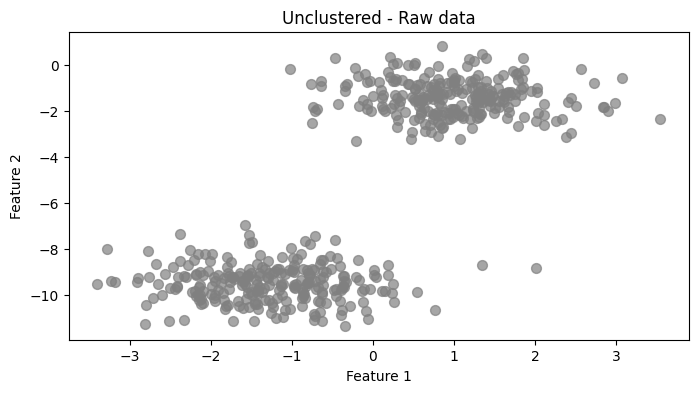

In [ ]:
# Plot raw data
plt.figure(figsize=(8, 4), facecolor='w')
plt.scatter(X[:, 0], X[:, 1], s=50, color='gray', alpha=0.7)
plt.title('Unclustered - Raw data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Randomly initialize centroids
def initialize_centroids(X, K):
  random_indices = np.random.choice(len(X), K, replace=False)
  centroids = X[random_indices]

  return centroids

In [ ]:
# Compute Euclidean distance
def compute_distance(a, b):

  return np.sqrt(np.sum((a - b)**2))

In [ ]:
# Assign points to the closest centroid
def assign_points(X, centroids):
  labels = []

  for point in X:
    distances = [compute_distance(point, centroid) for centroid in centroids]
    label = np.argmin(distances)
    labels.append(label)

  return np.array(labels)

In [ ]:
# Recalculate centroids
def recalculate_centroids(X, labels, K):

  return np.array([X[labels == k].mean(axis=0) for k in range(K)])

In [ ]:
# K-Means algorithm
def kmeans(X, K, max_iters=10):

  # 1. Randomly initialize centroids
  centroids = initialize_centroids(X, K)

  for it in range(max_iters):

    # 2. Assign points to the closest centroid
    labels = assign_points(X, centroids)

    # Plot the current state
    plt.figure(figsize=(8, 4))

    for i in range(K):
      cluster_points = X[labels == i]
      plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, alpha=0.7, label=f'Cluster {i+1}')


    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
    plt.title(f'Iteration: {it + 1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    print()

    # Recalculate centroids
    new_centroids = recalculate_centroids(X, labels, K)

    # Check for convergence
    if np.allclose(centroids, new_centroids):
      break

    centroids = new_centroids

  return centroids, labels

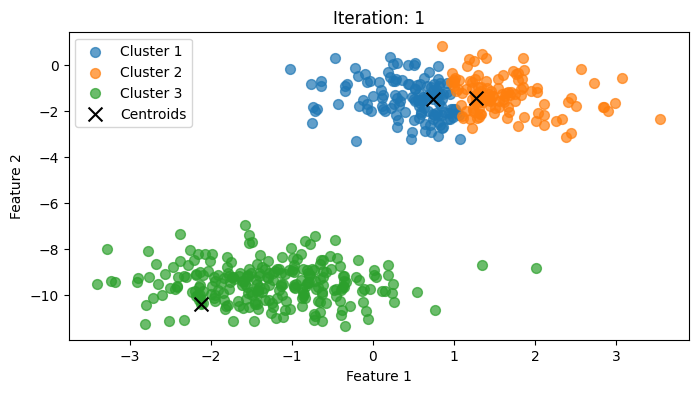

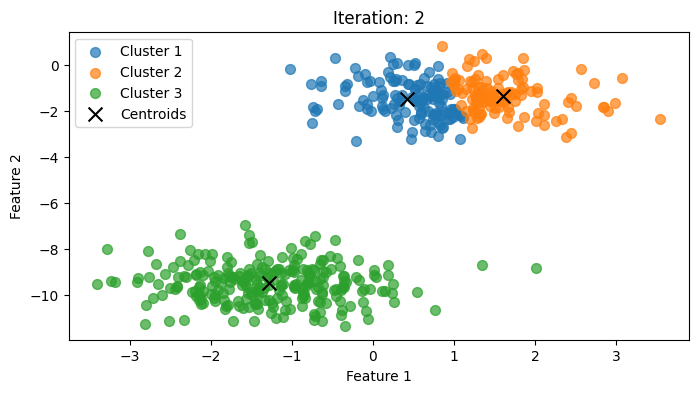

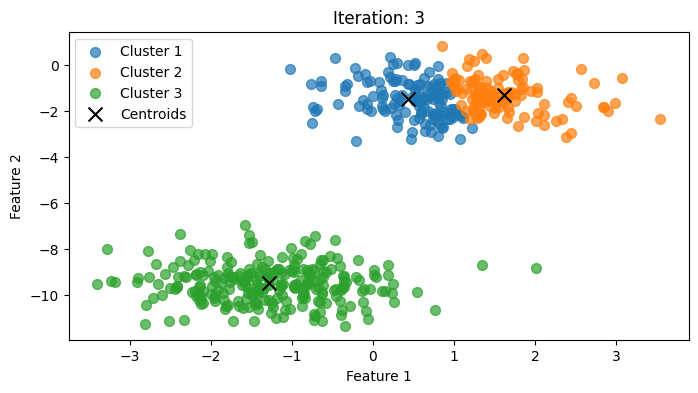

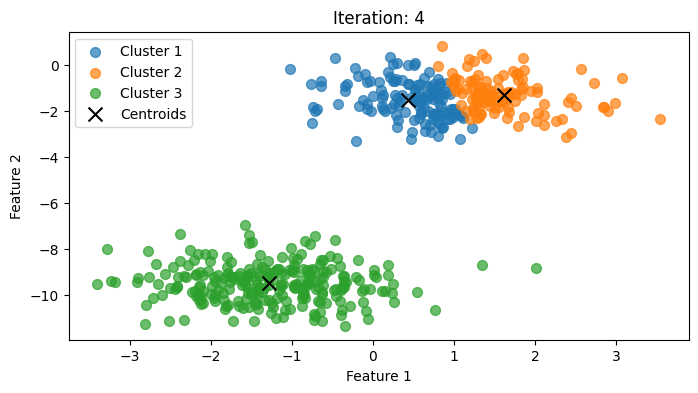

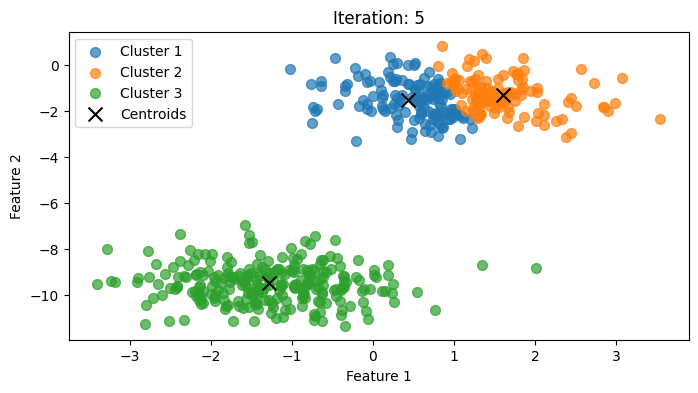

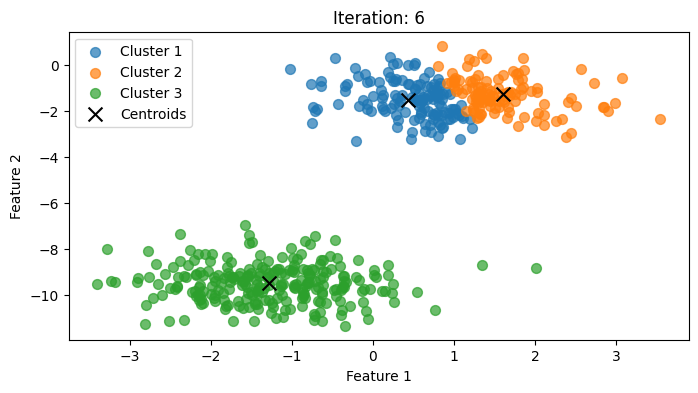

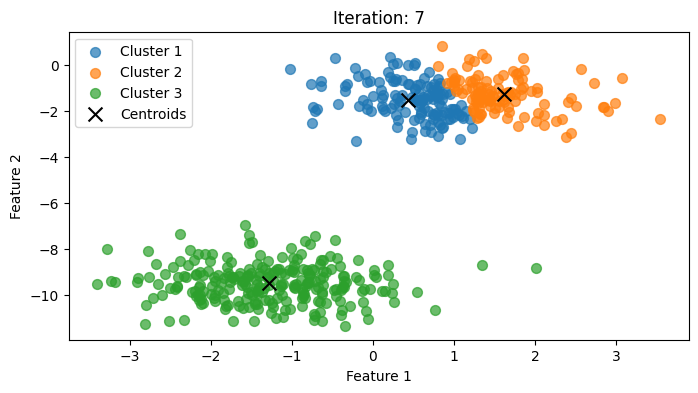

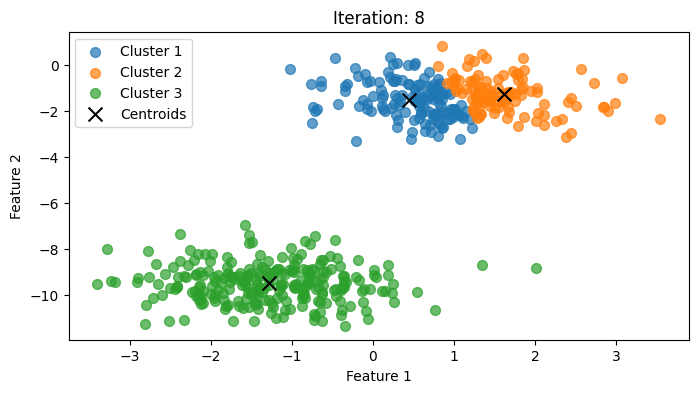

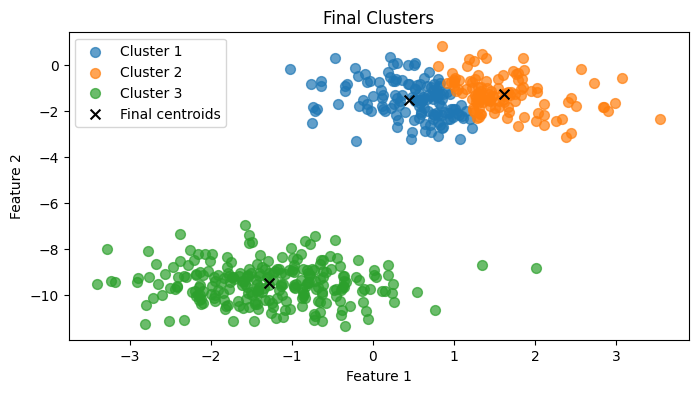

In [ ]:
# Number of clusters (K)
K = 3

# kmeans algorithm
final_centroids, final_labels = kmeans(X, K)

# Final result plot
plt.figure(figsize=(8, 4))
for i in range(K):
    plt.scatter(X[final_labels == i][:, 0], X[final_labels == i][:, 1], s=50, alpha=0.7, label=f'Cluster {i+1}')

plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='black', marker='x', s=50, label='Final centroids')

plt.title('Final Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()